<a href="https://colab.research.google.com/github/EnriqueAlfaro77/telecomx/blob/main/challenger2Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)

#  1. INTRODUCCIÓN
"""
Este análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (Churn) de la empresa Telecom X.
Para ello, se utilizó un conjunto de datos con información sobre clientes, servicios contratados y comportamiento de pago.

Comprender qué perfiles presentan más tendencia a abandonar la empresa permitirá generar acciones estratégicas para reducir esta tasa.
"""

#  2. CARGA Y LIMPIEZA DE DATOS

In [45]:
import pandas as pd
import numpy as np
import requests

# 1. Cargar JSON desde la URL
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

# 2. Normalizar el JSON anidado
df = pd.json_normalize(data)

# 3. Renombrar columnas
df.rename(columns=lambda x: x.replace('.', '_').lower(), inplace=True)

# 4. Limpieza de columnas binarias
cols_binarias = [
    'churn',
    'customer_partner',
    'customer_dependents',
    'phone_phoneservice',
    'account_paperlessbilling'
]
for col in cols_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 5. Eliminar valores nulos en churn
df = df.dropna(subset=['churn'])

# 6. Codificación de otras columnas
# Género
df['customer_gender'] = df['customer_gender'].map({'Male': 1, 'Female': 0})
# Servicio de internet
df['internet_internetservice'] = df['internet_internetservice'].map({
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
})
# Contrato simple
df['account_contract_simple'] = df['account_contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# 7. Unificar valores de servicio
cols_servicio = [
    'phone_multiplelines',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies'
]
for col in cols_servicio:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

# 8. Conversión a float
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

# 9. Crear columna cuentas_diarias
df['account_cuentas_diarias'] = df['account_charges_monthly'] / 30


#  3. ANÁLISIS EXPLORATORIO


             churn  customer_gender  customer_seniorcitizen  customer_partner  \
count  7043.000000      7043.000000             7043.000000       7043.000000   
mean      0.265370         0.504756                0.162147          0.483033   
std       0.441561         0.500013                0.368612          0.499748   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         1.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_dependents  customer_tenure  phone_phoneservice  \
count          7043.000000      7043.000000         7043.000000   
mean              0.299588        32.371149            0.903166   
std               0.458110        24.559481            0.295752   
mi

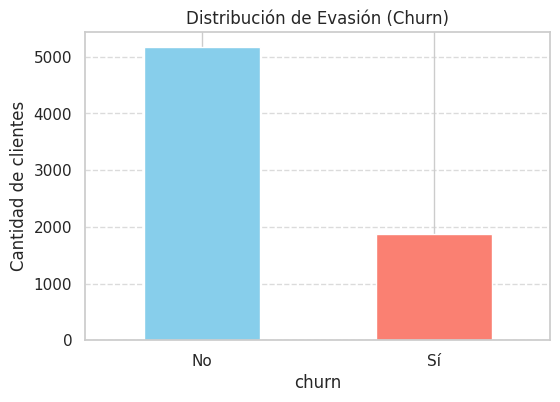

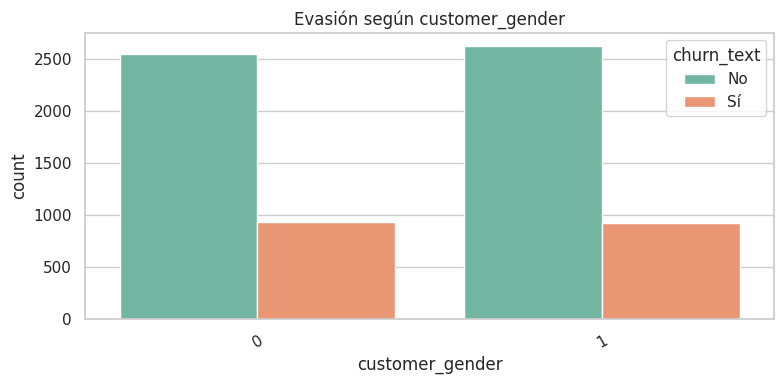

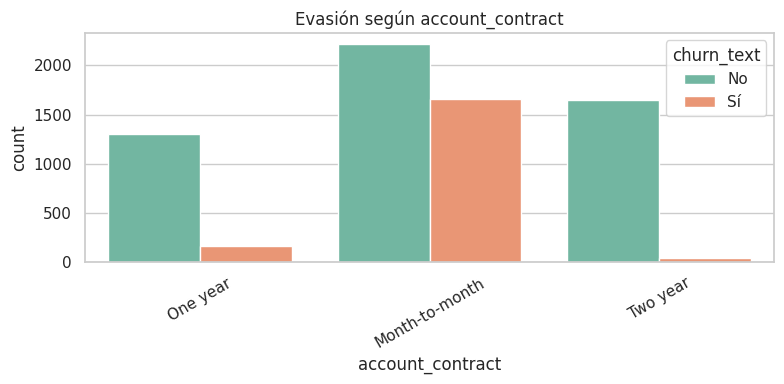

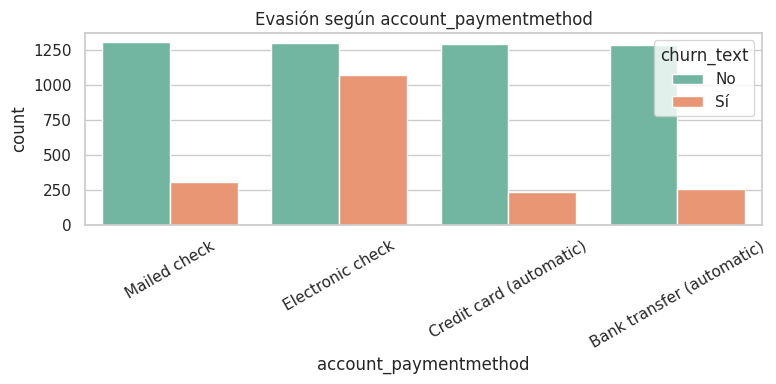

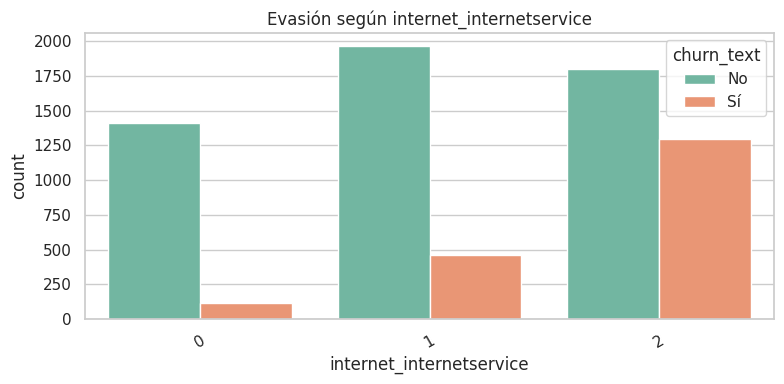

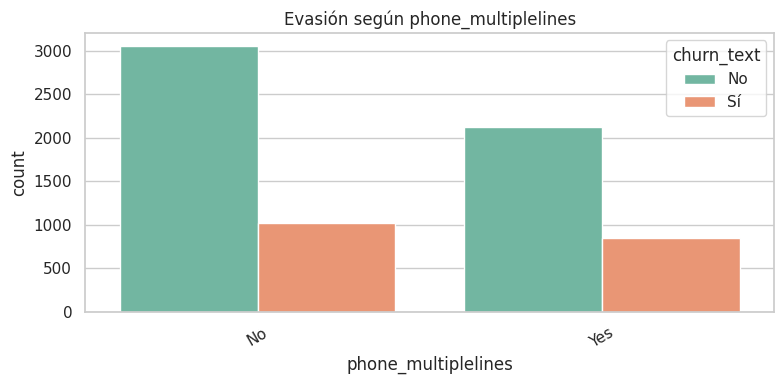

/tmp/ipython-input-46-2352289128.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account_charges_total', data=df, palette='Set2')


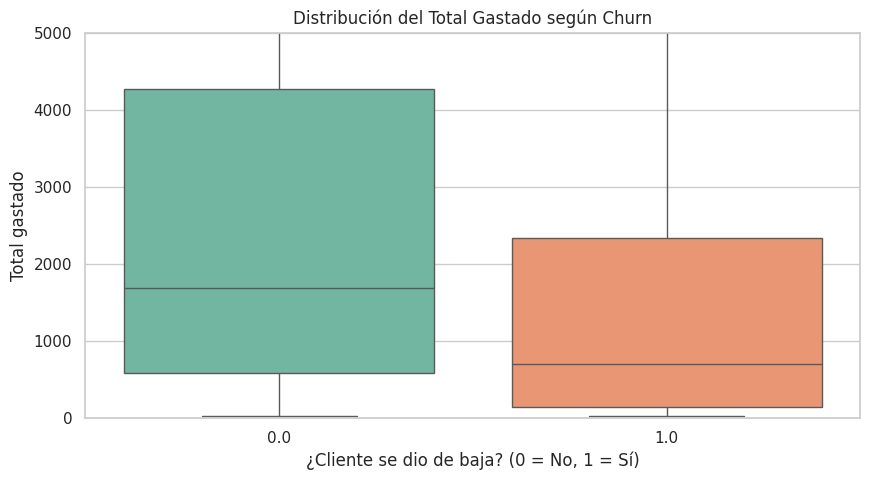

In [46]:
# Estadísticas generales
print(df.describe())

# Visualización de distribución de evasión
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Evasión (Churn)')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualización según variables categóricas
df['churn_text'] = df['churn'].replace({0: 'No', 1: 'Sí'})
variables = ['customer_gender', 'account_contract', 'account_paymentmethod',
             'internet_internetservice', 'phone_multiplelines']
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var, hue='churn_text', palette='Set2')
    plt.title(f'Evasión según {var}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# Visualización según variables numéricas
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='account_charges_total', data=df, palette='Set2')
plt.ylim(0, 5000)
plt.title('Distribución del Total Gastado según Churn')
plt.xlabel('¿Cliente se dio de baja? (0 = No, 1 = Sí)')
plt.ylabel('Total gastado')
plt.show()


#  4. CONCLUSIONES E INSIGHTS
"""
- Los clientes con contrato mensual presentan mayor evasión.
- El método de pago con más evasión es "Electronic check".
- A mayor total gastado, parece haber una leve relación con mayor churn.
- Clientes con servicio de fibra óptica tienen una tasa de evasión más alta.

Estos hallazgos pueden usarse para segmentar campañas de retención y mejorar la oferta de servicios.
"""


#  5. RECOMENDACIONES
"""
1. Implementar beneficios para clientes con contrato mensual que lleven varios meses.
2. Incentivar el uso de métodos de pago automáticos.
3. Evaluar la experiencia de clientes con fibra óptica para identificar causas de abandono.
4. Ofrecer planes personalizados a clientes con alta facturación mensual.
"""
